In [1]:
# Import utils
import sys
import os
sys.path.append(os.path.dirname(os.path.realpath('__file__'))+'/utils')
from versions import version_0, version_1, version_2
from engine import con
from null import null_sql, create_summary, create_plot

# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
condition = ''
summary = create_summary(version_0, version_1, version_2, null_sql, condition, con)

In [3]:
summary

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag
"dcp_pluto.""19v1""",859459,0,0,0,1487,577,1487,2205,1488,20938,2225,2212,2211,2407,2527,473,2543,839637,859255,859446,784664,859293,757743,859381,859459,856423,2543,473,2924,473,828416,1573,1551,491,48821,48821,48821,48821,48821,48821,48821,48821,473,1551,1551,473,473,1551,1551,1551,1551,58669,473,473,473,473,473,473,473,473,473,473,828566,858019,4224,473,473,473,0,0,850985,577,1624,1624,2388,843835,1385,1385,850095,767716,767716,0,0,2407,2211,824764,793747
"dcp_pluto.""19v2""",861053,1,0,0,1541,1541,1541,2256,1542,2267,2273,2263,2262,2454,2574,430,4145,841232,860849,861040,786256,860887,759343,860975,861053,858017,4145,429,2982,429,827436,2873,2851,449,49474,49474,49474,49474,49474,49474,49474,49474,429,2851,2851,429,429,2851,2851,2851,2851,60129,429,429,429,429,429,429,429,429,429,429,830159,859613,3183,429,429,429,0,0,852447,1541,1675,1675,3990,845427,1435,1435,861053,768869,768869,0,0,2454,2262,826362,795336
"dcp_pluto.""20v1""",861920,1,0,0,1634,1634,1634,2339,1635,2358,2356,2347,2346,2550,2670,401,4940,842133,861713,861907,787145,861753,760210,861842,861920,858884,4940,400,3009,400,827405,3508,3486,431,49034,49034,49034,49034,49034,49034,49034,49034,400,3486,3486,400,400,3486,3486,3486,3486,61240,400,400,400,400,400,400,400,400,400,400,831026,860480,3830,400,400,400,0,0,853240,1634,1767,1767,4873,846299,2314,2314,861920,769360,769360,0,0,2550,2346,827205,796165


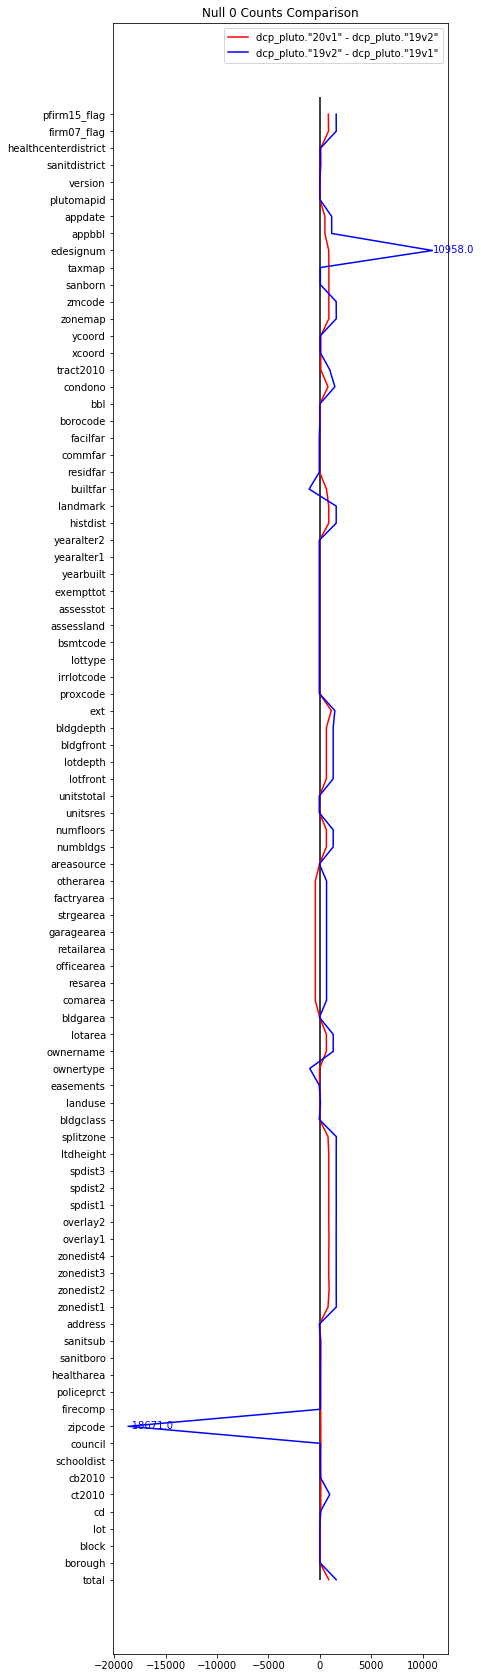

In [4]:
create_plot(summary, version_0, version_1, version_2, 'Null 0 Counts Comparison')

## Condo

In [5]:
condition = "WHERE right(bbl, 4) LIKE '75%%'"
summary = create_summary(version_0, version_1, version_2, null_sql, condition, con)

In [6]:
summary

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag
"dcp_pluto.""19v1""",8476,0,0,0,72,0,72,72,72,74,72,72,72,72,80,0,57,7795,8460,8474,7188,8469,6974,8471,8476,8365,57,0,79,0,8303,1,1,18,79,79,79,79,79,79,79,79,0,1,1,0,0,1,1,1,1,8402,0,0,0,0,0,0,0,0,0,0,7436,8392,29,0,0,0,0,0,2,0,76,76,57,8213,72,72,8283,160,160,0,0,72,72,8005,7727
"dcp_pluto.""19v2""",8608,0,0,0,131,131,131,131,131,131,131,131,131,131,139,1,62,7918,8592,8606,7297,8601,7076,8603,8608,8497,62,0,136,0,8366,1,1,20,138,138,138,138,138,138,138,138,0,1,1,0,0,1,1,1,1,8511,0,0,0,0,0,0,0,0,0,0,7568,8524,23,0,0,0,0,0,2,131,135,135,62,8340,131,131,8608,292,292,0,0,131,131,8129,7845
"dcp_pluto.""20v1""",8682,0,0,0,17,17,17,17,17,17,17,17,17,17,25,1,66,7988,8666,8680,7357,8675,7136,8677,8682,8570,66,0,210,0,8366,1,1,31,209,209,209,209,209,209,209,209,0,1,1,0,0,1,1,1,1,8576,0,0,0,0,0,0,0,0,0,0,7642,8598,35,0,0,0,0,0,2,17,20,20,66,8413,205,205,8682,366,366,0,0,17,17,8200,7914


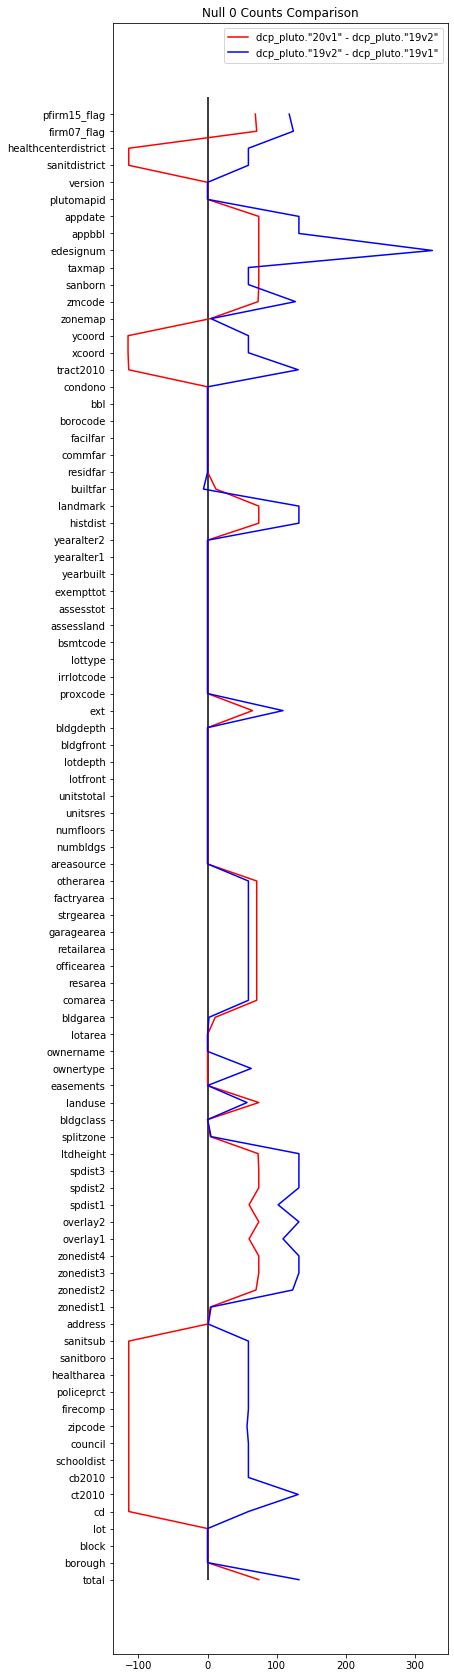

In [7]:
create_plot(summary, version_0, version_1, version_2, 'Null 0 Counts Comparison - Condo')